In [2]:
import __init__

In [3]:
import cv2
import os
import time
import matplotlib.pyplot as plt
import torch
import openvino as ov

In [ ]:
ls ../../model_weights

# detector

In [ ]:
from faceapi.faceDetector.detector import OpenvinoDetector

In [ ]:
core = ov.Core()
core.available_devices

In [ ]:
ls ../../model_weights/face-yolov8-m_openvino_model

In [ ]:
face_dector = OpenvinoDetector(model_path= "../../model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml", device='GPU')

In [ ]:
ls ../test.jpg

In [ ]:
# img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
img_file = "../test.jpg"
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'

img = cv2.imread(img_file, cv2.IMREAD_COLOR)#[..., ::-1]
display_img = img.copy()
faces = face_dector.handle(img)
for face in faces:
    x1,y1,x2,y2  = face.xyxy  
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
    
#embeddings = face_embedder.handle(face_img_list)
plt.figure(figsize=(40,20))
plt.imshow(display_img[..., ::-1])

# age

In [ ]:
from faceapi.faceAge.detector import UTKfaceAgeOpenvinoDetector

In [ ]:
ls ../../model_weights/

In [ ]:
face_age_dector = UTKfaceAgeOpenvinoDetector(model_path= "../../model_weights/face_age_openvino_model/face_age_resnet18.xml", device='GPU')

In [ ]:
# img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
img_file = "../test.jpg"
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'

img = cv2.imread(img_file, cv2.IMREAD_COLOR)#[..., ::-1]
display_img = img.copy()
faces = face_dector.handle(img)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_face_img_list = []
face_img_list = []
for face in faces:
    x1,y1,x2,y2  = face.xyxy

    face_img_list.append(img[y1:y2,x1:x2,:])
    rgb_face_img_list.append(rgb_img[y1:y2,x1:x2,:])

    
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
    
#embeddings = face_embedder.handle(face_img_list)
plt.figure(figsize=(40,20))
plt.imshow(display_img[..., ::-1])

In [ ]:
face_age_dector.handle(rgb_face_img_list)

# emotion

In [ ]:
ls ../../model_weights

In [ ]:
from faceapi.faceEmotion.detector import RafEmotionOpenvinoDetector

In [ ]:
face_emotion_dector = RafEmotionOpenvinoDetector(model_path= "../../model_weights/face_emotion_openvino_model/face_emotion_resnet18.xml", device='GPU')

In [ ]:
face_emotion_dector.handle(rgb_face_img_list)

# gender

In [ ]:
ls ../../model_weights/face_gender_openvino_model

In [ ]:
from faceapi.faceGender.detector import UTKfaceGenderOpenvinoDetector

In [ ]:
face_gender_dector = UTKfaceGenderOpenvinoDetector(model_path= "../../model_weights/face_gender_openvino_model/face_gender_resnet18.xml", device='GPU')

In [ ]:
face_gender_dector.handle(rgb_face_img_list)

In [4]:
from faceapi import OpenvinoFaceAPIManager

/usr/lib/python3.10/importlib/util.py:247: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
  self.__spec__.loader.exec_module(self)


In [5]:
core = ov.Core()
core.available_devices

['CPU', 'GPU', 'NPU']

In [6]:
ls ../../model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml

../../model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml


In [7]:
face_api_manager = OpenvinoFaceAPIManager(
    detector_model_path= "../../model_weights/face-yolov8-m_openvino_model/face-yolov8-m.xml",
    # encoder_model_path=r'C:\Users\jeffg\face-project\face-api\model_weights\feifei_face.pt',
    emotion_model_path= "../../model_weights/face_emotion_openvino_model/face_emotion_resnet18.xml", 
    age_model_path =   "../../model_weights/face_age_openvino_model/face_age_resnet18.xml", 
    gender_model_path = "../../model_weights/face_gender_openvino_model/face_gender_resnet18.xml", 

    device= 'GPU'
)

# reid_encoder = FastReIDInterface(
#     r'..\package\botsort\fast_reid\configs\MOT17\sbs_S50.yml', 
#     r'..\package\botsort\reid_model\mot17_sbs_S50.pth', 
#     face_api_manager._encoder._devie
# )

In [8]:
ls ..

dataset/                 face-api測試文件.ipynb  openvino/     test.jpg
face-api-finetune.ipynb  __init__.py             __pycache__/


0.3393971920013428

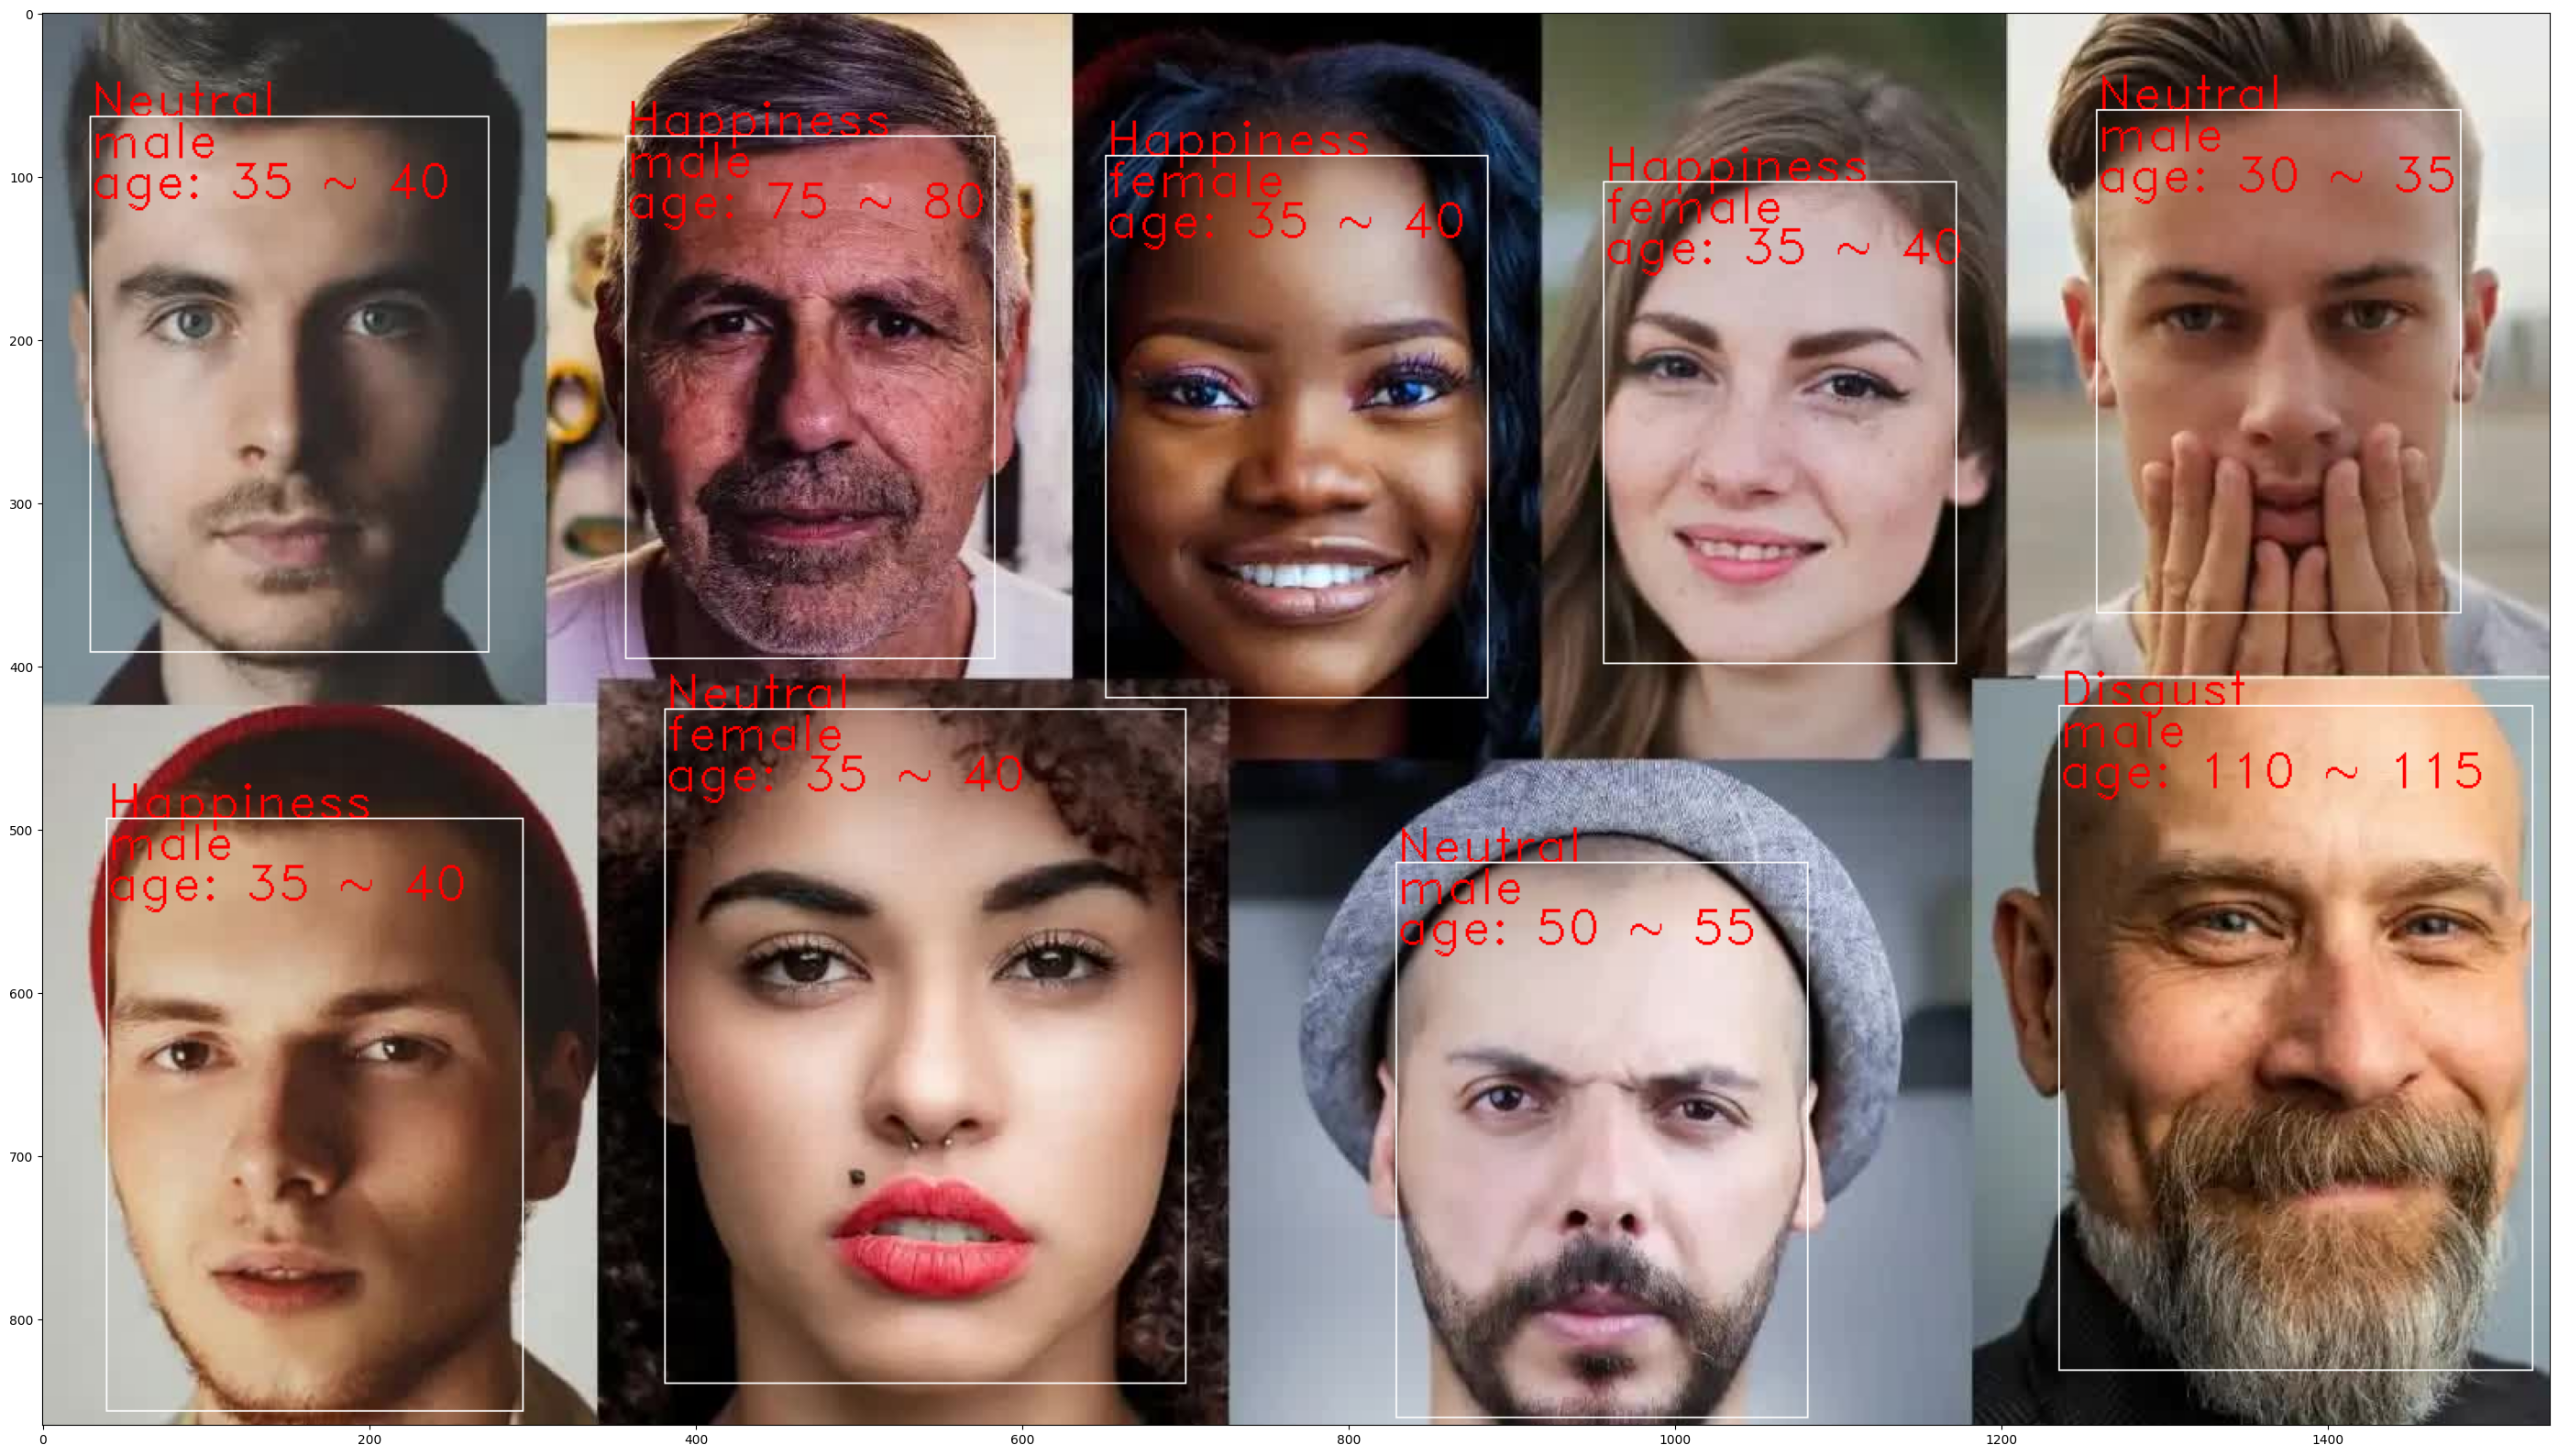

In [9]:
# img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:\Users\jeffg\ai-data\face-database\classify - 複製\9\64fc0389b6db50bc1f756e0e-166-4154.png'
img_file = '../test.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'


img = cv2.imread(img_file, cv2.IMREAD_COLOR)#[..., ::-1]
display_img = img.copy()


st = time.time()
faces = face_api_manager.handle(img, conf=0.5)
for face in faces:
    if len(face.embedding)>0:
        pred_idx = face.embedding.argmax()
        pred_prob = face.embedding[pred_idx]
        print({
           v: k
           for k , v in face_api_manager._encoder.class_to_idx.items()
        }[pred_idx], pred_prob)
    
    x1,y1,x2,y2  = face.xyxy  
    #reid = reid_encoder.inference(img, np.array(face.xyxy)[None]).ravel()
    cv2.putText(display_img, f"%s"%(face.emotion), (x1, y1),
                cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
    cv2.putText(display_img, f"%s"%(face.gender), (x1, y1 + 25),
                cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
    cv2.putText(display_img, f"%s"%(face.age), (x1, y1 + 50),
                cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
    cv2.rectangle(display_img, ( x1,y1), (x2,y2), (255, 255, 255))
    
#embeddings = face_embedder.handle(face_img_list)
plt.figure(figsize=(40,20))
plt.imshow(display_img[..., ::-1])
cost = time.time() -st
cost

In [41]:
cap = cv2.VideoCapture("rtsp://172.23.200.68/live1.sdp")

In [42]:
d, frame = cap.read()

In [43]:
frame.shape

(1920, 5120, 3)

In [44]:

cv2.namedWindow("camera")
while 1:
    d, frame = cap.read()
    if not d:
        print('no image')
        break

    display_frame = frame.copy()
    faces = face_api_manager.handle(frame, conf=0.3)
    for face in faces:
        label = "None"
        pred_prob = 0.0
        if len(face.embedding)>0:
            pred_idx = face.embedding.argmax()
            # 如果爆掉，很大原因是因為不是finetune model
            pred_prob = face.embedding[pred_idx]
            label = {
               v: k
               for k , v in face_api_manager._encoder.class_to_idx.items()
            }[pred_idx]
            #print(label, pred_prob)
        
        x1,y1,x2,y2  = face.xyxy  
        #reid = reid_encoder.inference(img, np.array(face.xyxy)[None]).ravel()
        cv2.putText(display_frame, f"%s"%(face.emotion), (x1, y1),
                    cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
        cv2.putText(display_frame, f"%s"%(face.gender), (x1, y1 + 25),
                    cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
        cv2.putText(display_frame, f"%s"%(face.age), (x1, y1 + 50),
                    cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
        cv2.rectangle(display_frame, ( x1,y1), (x2,y2), (255, 255, 255))
        
    
    #cv2.resizeWindow("camera", 300, 200)
    cv2.imshow("camera", cv2.resize(display_frame, (1600,1000 )))
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('q'):  # q to quit
        print('Quit')
        break
        
cv2.destroyAllWindows()
cap.release()

[h264 @ 0x5b14def75700] error while decoding MB 98 27, bytestream -15
[h264 @ 0x5b14e6944ec0] cabac decode of qscale diff failed at 246 40
[h264 @ 0x5b14e6944ec0] error while decoding MB 246 40, bytestream -5
[h264 @ 0x5b14e06389c0] error while decoding MB 97 50, bytestream -5
[h264 @ 0x5b14e0d65000] error while decoding MB 312 43, bytestream -7
[h264 @ 0x5b14e0eda4c0] reference picture missing during reorder
[h264 @ 0x5b14e0eda4c0] Missing reference picture, default is 65595
[h264 @ 0x5b14def75700] mmco: unref short failure
[h264 @ 0x5b14def75700] illegal short term buffer state detected
[h264 @ 0x5b14def86fc0] error while decoding MB 260 38, bytestream -7
[h264 @ 0x5b14e0eda4c0] error while decoding MB 257 24, bytestream -5
[h264 @ 0x5b14e6944ec0] error while decoding MB 241 110, bytestream -5
[h264 @ 0x5b14e63811c0] error while decoding MB 278 43, bytestream -9
[h264 @ 0x5b14e6944ec0] error while decoding MB 156 32, bytestream -7
[h264 @ 0x5b14e06389c0] error while decoding MB 18 11

Quit


[h264 @ 0x5b14e1862440] error while decoding MB 191 95, bytestream -5


In [45]:
faces

[FaceDetection(xyxy=[3734, 458, 3918, 722], score=0.796875, landms=[], embedding=[], emotion=np.str_('Sadness'), age=np.str_('age: 100 ~ 105'), gender=np.str_('male')),
 FaceDetection(xyxy=[4498, 220, 4638, 430], score=0.7724609375, landms=[], embedding=[], emotion=np.str_('Neutral'), age=np.str_('age: 75 ~ 80'), gender=np.str_('male')),
 FaceDetection(xyxy=[1684, 144, 1800, 300], score=0.62060546875, landms=[], embedding=[], emotion=np.str_('Happiness'), age=np.str_('age: 45 ~ 50'), gender=np.str_('female')),
 FaceDetection(xyxy=[2660, 452, 2728, 544], score=0.445556640625, landms=[], embedding=[], emotion=np.str_('Happiness'), age=np.str_('age: 75 ~ 80'), gender=np.str_('male')),
 FaceDetection(xyxy=[2444, 419, 2508, 501], score=0.3056640625, landms=[], embedding=[], emotion=np.str_('Neutral'), age=np.str_('age: 40 ~ 45'), gender=np.str_('male'))]

In [19]:
?cv2.resizeWindow

Docstring:
resizeWindow(winname, width, height) -> None
.   @brief Resizes the window to the specified size
.   
.   @note The specified window size is for the image area. Toolbars are not counted.
.   Only windows created without cv::WINDOW_AUTOSIZE flag can be resized.
.   
.   @param winname Window name.
.   @param width The new window width.
.   @param height The new window height.



resizeWindow(winname, size) -> None
.   @overload
.   @param winname Window name.
.   @param size The new window size.
Type:      builtin_function_or_method